In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

In [3]:
start = datetime.datetime(2012, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['KO','PEP','SPY']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
KO_PEP = pd.concat(df_map,axis = 1,keys = tickers)
KO_PEP.columns.names = ['Stock Ticker','Stock Info']

close_price = KO_PEP.xs(key='Close',axis=1,level='Stock Info')
close_price

Stock Ticker,KO,PEP,SPY
Date,,,
2012-01-03,35.070000,66.400002,127.500000
2012-01-04,34.849998,66.739998,127.699997
2012-01-05,34.685001,66.220001,128.039993
2012-01-06,34.465000,65.389999,127.709999
2012-01-09,34.465000,65.730003,128.020004
...,...,...,...
2022-07-11,62.939999,170.470001,384.230011
2022-07-12,62.669998,169.500000,380.829987
2022-07-13,62.380001,170.100006,378.829987


In [4]:
df_macro = pd.read_csv('../macro_data.csv',index_col=[0])
df_macro['dt'] = pd.to_datetime(df_macro['dt'])
df_macro

,dt,S&P,gdp,M2SL,FEDFUNDS,DGS3MO,DGS6MO,DGS10,BAMLH0A0HYM2,CPI,PPIACO,PAYEMS,UNRATE,UMCSENT
13687,2012-07-16,1353.64,16319.540,10051.8,0.16,0.10,0.14,1.50,6.39,96.444559,96.444559,134159.0,8.2,72.3
13688,2012-07-17,1363.67,16319.540,10051.8,0.16,0.10,0.14,1.53,6.36,96.444559,96.444559,134159.0,8.2,72.3
13689,2012-07-18,1372.78,16319.540,10051.8,0.16,0.09,0.14,1.52,6.33,96.444559,96.444559,134159.0,8.2,72.3
13690,2012-07-19,1376.51,16319.540,10051.8,0.16,0.09,0.14,1.54,6.25,96.444559,96.444559,134159.0,8.2,72.3
13691,2012-07-20,1362.66,16319.540,10051.8,0.16,0.09,0.14,1.49,6.28,96.444559,96.444559,134159.0,8.2,72.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16359,2022-07-11,3854.43,24386.734,21754.2,1.21,2.18,2.79,2.99,5.44,122.975989,122.975989,151980.0,3.6,58.4
16360,2022-07-12,3818.80,24386.734,21754.2,1.21,2.22,2.78,2.96,5.43,122.975989,122.975989,151980.0,3.6,58.4
16361,2022-07-13,3801.78,24386.734,21754.2,1.21,2.39,2.96,2.91,5.47,122.975989,122.975989,151980.0,3.6,58.4
16362,2022-07-14,3790.38,24386.734,21754.2,1.21,2.40,2.93,2.96,5.53,122.975989,122.975989,151980.0,3.6,58.4


In [5]:
df_PEP_fundamental = pd.read_csv('../PEP_fundamentals.csv')
df_PEP_fundamental['quarter-end'] = pd.to_datetime(df_PEP_fundamental['quarter-end'])
df_PEP_fundamental['dt'] = pd.to_datetime(df_PEP_fundamental['dt'])
df_PEP_fundamental.dtypes

quarter-end                   datetime64[ns]
dt                            datetime64[ns]
ticker                                object
Sales                                  int64
EBITDA                               float64
Net Debt                               int64
Return on Assets                     float64
Return on Equity                     float64
EBITDA/Interest Expense              float64
Diluted Shares Outstanding             int64
Dividend Yield (%)                   float64
dtype: object

In [6]:
df_KO_fundamental = pd.read_csv('../KO_fundamentals.csv')
df_KO_fundamental['quarter-end'] = pd.to_datetime(df_KO_fundamental['quarter-end'])
df_KO_fundamental['dt'] = pd.to_datetime(df_KO_fundamental['dt'])
df_KO_fundamental.dtypes

quarter-end                   datetime64[ns]
dt                            datetime64[ns]
ticker                                object
Sales                                  int64
EBITDA                                 int64
Net Debt                               int64
Return on Assets                     float64
Return on Equity                     float64
EBITDA/Interest Expense              float64
Diluted Shares Outstanding             int64
Dividend Yield (%)                   float64
dtype: object

In [12]:
df_fundamental = df_KO_fundamental.set_index('dt').join(df_PEP_fundamental.set_index('dt'), how = 'outer',lsuffix='_KO', rsuffix='_PEP')
df_fundamental['TTL_Sales_KO'] = df_fundamental['Sales_KO'].dropna().rolling(4).sum()
df_fundamental['TTL_Sales_PEP'] = df_fundamental['Sales_PEP'].dropna().rolling(4).sum()
df_fundamental['TTL_EBITDA_KO'] = df_fundamental['EBITDA_KO'].dropna().rolling(4).sum()
df_fundamental['TTL_EBITDA_PEP'] = df_fundamental['EBITDA_PEP'].dropna().rolling(4).sum()
#df_fundamental.to_csv('df_fundamental.csv')

In [13]:
df_fundamental = df_fundamental.join(close_price, how='outer')
df_fundamental = df_fundamental.ffill().dropna()

In [15]:
df_fundamental

,quarter-end_KO,ticker_KO,Sales_KO,EBITDA_KO,Net Debt_KO,Return on Assets_KO,Return on Equity_KO,EBITDA/Interest Expense_KO,Diluted Shares Outstanding_KO,Dividend Yield (%)_KO,...,EBITDA/Interest Expense_PEP,Diluted Shares Outstanding_PEP,Dividend Yield (%)_PEP,TTL_Sales_KO,TTL_Sales_PEP,TTL_EBITDA_KO,TTL_EBITDA_PEP,KO,PEP,SPY
2013-04-18,2013-03-31,KO,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,...,16.470588,1563.0,2.733978,47916.0,65645.0,13348.0,12245.00000,42.099998,81.250000,154.139999
2013-04-19,2013-03-31,KO,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,...,16.470588,1563.0,2.733978,47916.0,65645.0,13348.0,12245.00000,42.660000,82.769997,155.479996
2013-04-22,2013-03-31,KO,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,...,16.470588,1563.0,2.733978,47916.0,65645.0,13348.0,12245.00000,42.720001,83.379997,156.169998
2013-04-23,2013-03-31,KO,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,...,16.470588,1563.0,2.733978,47916.0,65645.0,13348.0,12245.00000,42.700001,84.099998,157.779999
2013-04-24,2013-03-31,KO,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,...,16.470588,1563.0,2.733978,47916.0,65645.0,13348.0,12245.00000,42.150002,82.339996,157.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2022-03-31,KO,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,...,11.850000,1391.0,2.641440,40180.0,80851.0,13704.0,13840.99998,62.939999,170.470001,384.230011
2022-07-12,2022-03-31,KO,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,...,11.850000,1391.0,2.641440,40180.0,80851.0,13704.0,13840.99998,62.669998,169.500000,380.829987
2022-07-13,2022-03-31,KO,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,...,11.850000,1391.0,2.641440,40180.0,80851.0,13704.0,13840.99998,62.380001,170.100006,378.829987
2022-07-14,2022-03-31,KO,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,...,11.850000,1391.0,2.641440,40180.0,80851.0,13704.0,13840.99998,62.180000,170.979996,377.910004


In [10]:
df_fundamental.drop(['ticker_KO','ticker_PEP','quarter-end_KO','quarter-end_PEP'], axis=1, inplace=True)


<AxesSubplot:>

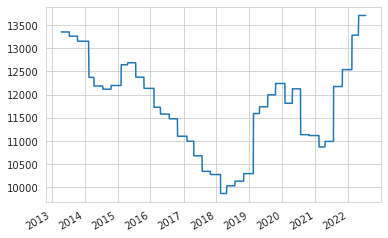

In [11]:
df_fundamental['TTL_EBITDA_KO'].plot()

In [12]:
df_fundamental = df_fundamental.rename(columns={"KO": "KO_price", "PEP": "PEP_price"})
# df_fundamental['KO_daily'] = df_fundamental['KO_price'].pct_change()*100
# df_fundamental['PEP_daily'] = df_fundamental['PEP_price'].pct_change()*100
# df_fundamental['S&P_daily'] = df_fundamental['SPY'].pct_change()*100
df_fundamental.columns


Index(['Sales_KO', 'EBITDA_KO', 'Net Debt_KO', 'Return on Assets_KO',
       'Return on Equity_KO', 'EBITDA/Interest Expense_KO',
       'Diluted Shares Outstanding_KO', 'Dividend Yield (%)_KO', 'Sales_PEP',
       'EBITDA_PEP', 'Net Debt_PEP', 'Return on Assets_PEP',
       'Return on Equity_PEP', 'EBITDA/Interest Expense_PEP',
       'Diluted Shares Outstanding_PEP', 'Dividend Yield (%)_PEP',
       'TTL_Sales_KO', 'TTL_Sales_PEP', 'TTL_EBITDA_KO', 'TTL_EBITDA_PEP',
       'KO_price', 'PEP_price', 'SPY'],
      dtype='object')

<AxesSubplot:>

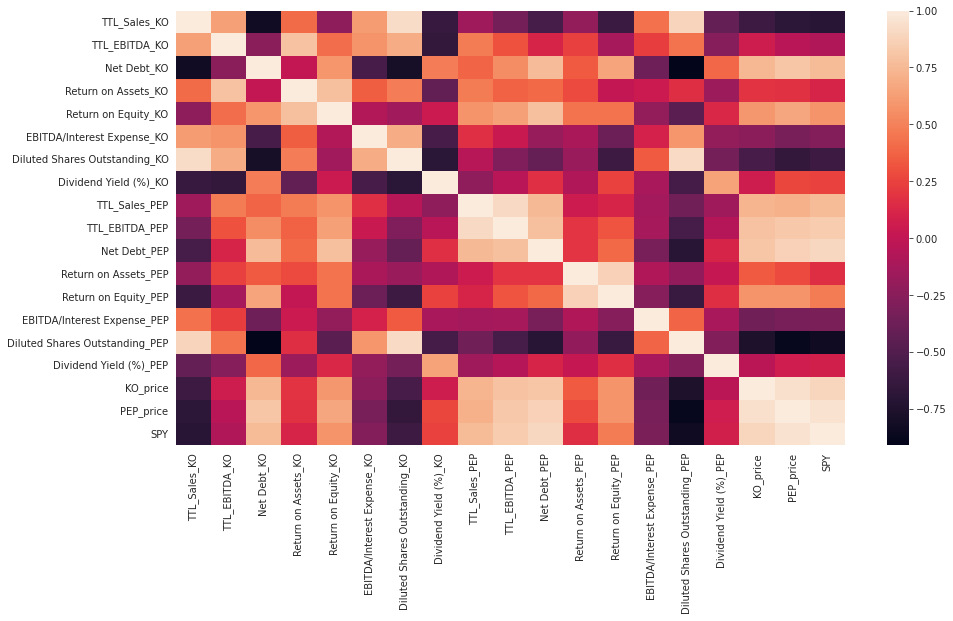

In [13]:

plt.figure(figsize = (15,8))
sns.heatmap(df_fundamental[['TTL_Sales_KO', 'TTL_EBITDA_KO', 
                            'Net Debt_KO', 'Return on Assets_KO', 'Return on Equity_KO', 'EBITDA/Interest Expense_KO',
       'Diluted Shares Outstanding_KO', 'Dividend Yield (%)_KO', 'TTL_Sales_PEP','TTL_EBITDA_PEP', 'Net Debt_PEP', 'Return on Assets_PEP',
       'Return on Equity_PEP', 'EBITDA/Interest Expense_PEP',
       'Diluted Shares Outstanding_PEP', 'Dividend Yield (%)_PEP', 'KO_price',
       'PEP_price', 'SPY']].corr())
#sns.heatmap(df_fundamental.corr().abs())

In [14]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt
plt.figure(figsize = (15,8))

std_scaler = StandardScaler() 
df_scaled = std_scaler.fit_transform(df_fundamental.to_numpy())
df_scaled
df_scaled = pd.DataFrame(df_scaled, columns=['Sales_KO', 'EBITDA_KO', 'Net Debt_KO', 'Return on Assets_KO',
       'Return on Equity_KO', 'EBITDA/Interest Expense_KO',
       'Diluted Shares Outstanding_KO', 'Dividend Yield (%)_KO', 'Sales_PEP',
       'EBITDA_PEP', 'Net Debt_PEP', 'Return on Assets_PEP',
       'Return on Equity_PEP', 'EBITDA/Interest Expense_PEP',
       'Diluted Shares Outstanding_PEP', 'Dividend Yield (%)_PEP',
       'TTL_Sales_KO', 'TTL_Sales_PEP', 'TTL_EBITDA_KO', 'TTL_EBITDA_PEP',
       'KO_price', 'PEP_price', 'SPY'])
df_scaled

,Sales_KO,EBITDA_KO,Net Debt_KO,Return on Assets_KO,Return on Equity_KO,EBITDA/Interest Expense_KO,Diluted Shares Outstanding_KO,Dividend Yield (%)_KO,Sales_PEP,EBITDA_PEP,...,EBITDA/Interest Expense_PEP,Diluted Shares Outstanding_PEP,Dividend Yield (%)_PEP,TTL_Sales_KO,TTL_Sales_PEP,TTL_EBITDA_KO,TTL_EBITDA_PEP,KO_price,PEP_price,SPY
0,0.772992,0.148405,-1.562211,0.935464,-0.281433,1.178698,2.340119,-1.920328,-1.457495,-2.175931,...,0.109193,1.924422,-0.423886,1.569503,-0.251269,1.625595,-1.379438,-0.720480,-1.421254,-1.407446
1,0.772992,0.148405,-1.562211,0.935464,-0.281433,1.178698,2.340119,-1.920328,-1.457495,-2.175931,...,0.109193,1.924422,-0.423886,1.569503,-0.251269,1.625595,-1.379438,-0.632775,-1.359674,-1.391407
2,0.772992,0.148405,-1.562211,0.935464,-0.281433,1.178698,2.340119,-1.920328,-1.457495,-2.175931,...,0.109193,1.924422,-0.423886,1.569503,-0.251269,1.625595,-1.379438,-0.623377,-1.334960,-1.383147
3,0.772992,0.148405,-1.562211,0.935464,-0.281433,1.178698,2.340119,-1.920328,-1.457495,-2.175931,...,0.109193,1.924422,-0.423886,1.569503,-0.251269,1.625595,-1.379438,-0.626510,-1.305791,-1.363876
4,0.772992,0.148405,-1.562211,0.935464,-0.281433,1.178698,2.340119,-1.920328,-1.457495,-2.175931,...,0.109193,1.924422,-0.423886,1.569503,-0.251269,1.625595,-1.379438,-0.712649,-1.377094,-1.362679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,0.401947,1.423308,1.084220,1.378600,1.290903,0.238850,-0.174681,-1.484071,-0.167748,-1.386557,...,-0.411907,-1.047420,-0.878917,0.060087,3.222254,1.983389,2.129038,2.617026,2.202674,1.334953
2321,0.401947,1.423308,1.084220,1.378600,1.290903,0.238850,-0.174681,-1.484071,-0.167748,-1.386557,...,-0.411907,-1.047420,-0.878917,0.060087,3.222254,1.983389,2.129038,2.538717,2.188899,1.403660
2322,0.401947,1.423308,1.084220,1.378600,1.290903,0.238850,-0.174681,-1.484071,-0.167748,-1.386557,...,-0.411907,-1.047420,-0.878917,0.060087,3.222254,1.983389,2.129038,2.574739,2.250480,1.399830
2323,0.401947,1.423308,1.084220,1.378600,1.290903,0.238850,-0.174681,-1.484071,-0.167748,-1.386557,...,-0.411907,-1.047420,-0.878917,0.060087,3.222254,1.983389,2.129038,2.543416,2.193356,1.346684


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

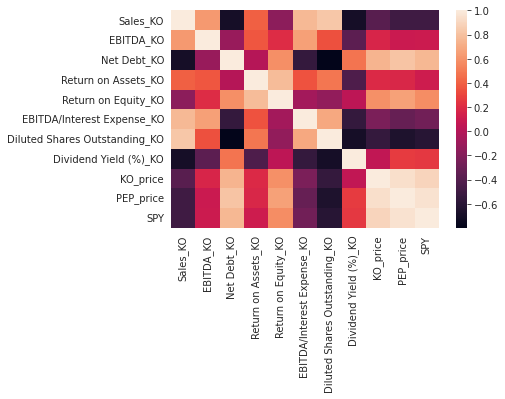

In [15]:
sns.heatmap(df_scaled[['Sales_KO', 'EBITDA_KO', 'Net Debt_KO', 'Return on Assets_KO',
       'Return on Equity_KO', 'EBITDA/Interest Expense_KO',
       'Diluted Shares Outstanding_KO', 'Dividend Yield (%)_KO','KO_price',
       'PEP_price', 'SPY']].corr())

<AxesSubplot:>

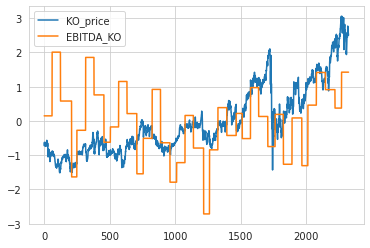

In [16]:
df_scaled[['KO_price','EBITDA_KO']].plot()

In [17]:
ffeature_list = ['KO_price','PEP_price','SPY','EBITDA_KO','EBITDA_PEP']

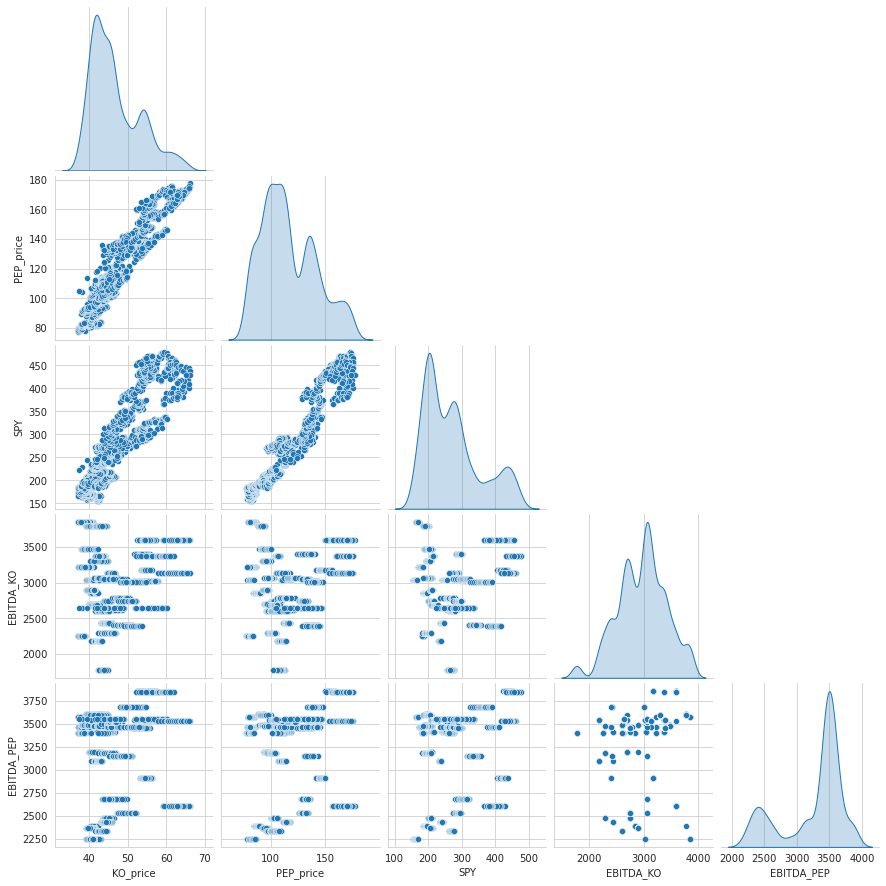

In [18]:
sns.pairplot(df_fundamental[ffeature_list], diag_kind = 'kde',corner=True)

In [19]:
df_fundamental['PEP_daily'] = df_fundamental['PEP_price'].pct_change()
df_fundamental['KO_daily'] = df_fundamental['KO_price'].pct_change()
df_fundamental['S&P_daily'] = df_fundamental['SPY'].pct_change()
df_fundamental

,Sales_KO,EBITDA_KO,Net Debt_KO,Return on Assets_KO,Return on Equity_KO,EBITDA/Interest Expense_KO,Diluted Shares Outstanding_KO,Dividend Yield (%)_KO,Sales_PEP,EBITDA_PEP,...,TTL_Sales_KO,TTL_Sales_PEP,TTL_EBITDA_KO,TTL_EBITDA_PEP,KO_price,PEP_price,SPY,PEP_daily,KO_daily,S&P_daily
2013-04-18,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,12581.0,2240.00000,...,47916.0,65645.0,13348.0,12245.00000,42.099998,81.250000,154.139999,NaN,NaN,NaN
2013-04-19,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,12581.0,2240.00000,...,47916.0,65645.0,13348.0,12245.00000,42.660000,82.769997,155.479996,0.018708,0.013302,0.008693
2013-04-22,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,12581.0,2240.00000,...,47916.0,65645.0,13348.0,12245.00000,42.720001,83.379997,156.169998,0.007370,0.001407,0.004438
2013-04-23,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,12581.0,2240.00000,...,47916.0,65645.0,13348.0,12245.00000,42.700001,84.099998,157.779999,0.008635,-0.000468,0.010309
2013-04-24,11018.0,3036.0,16690.0,10.114478,26.696070,27.853211,4530.0,2.584075,12581.0,2240.00000,...,47916.0,65645.0,13348.0,12245.00000,42.150002,82.339996,157.880005,-0.020927,-0.012881,0.000634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,16202.0,2606.99998,...,40180.0,80851.0,13704.0,13840.99998,63.410000,170.699997,383.250000,0.009999,0.002054,0.003377
2022-07-07,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,16202.0,2606.99998,...,40180.0,80851.0,13704.0,13840.99998,62.910000,170.360001,388.989990,-0.001992,-0.007885,0.014977
2022-07-08,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,16202.0,2606.99998,...,40180.0,80851.0,13704.0,13840.99998,63.139999,171.880005,388.670013,0.008922,0.003656,-0.000823
2022-07-11,10498.0,3599.0,31345.0,11.199791,45.606195,20.106145,4357.0,2.703992,16202.0,2606.99998,...,40180.0,80851.0,13704.0,13840.99998,62.939999,170.470001,384.230011,-0.008203,-0.003168,-0.011424


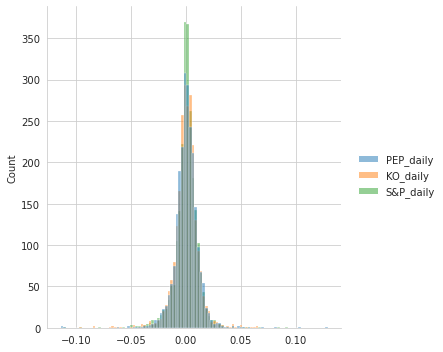

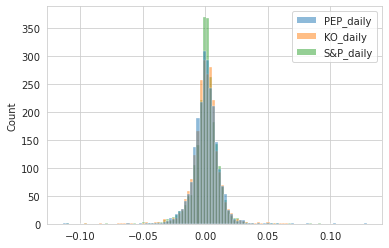

/home/dl_/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



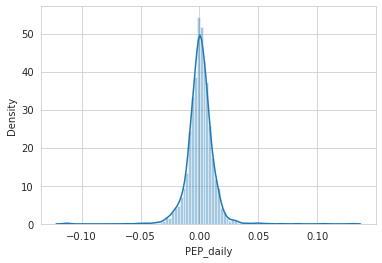

/home/dl_/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



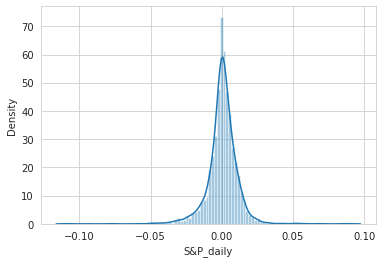

In [20]:
sns.displot(df_fundamental[['PEP_daily','KO_daily','S&P_daily']].dropna(), bins=100)
plt.show()
sns.histplot(df_fundamental[['PEP_daily','KO_daily','S&P_daily']].dropna(), bins=100)
plt.show()
sns.distplot(df_fundamental['PEP_daily'].dropna(), bins=100)
plt.show()
sns.distplot(df_fundamental['S&P_daily'].dropna(), bins=100)
plt.show()

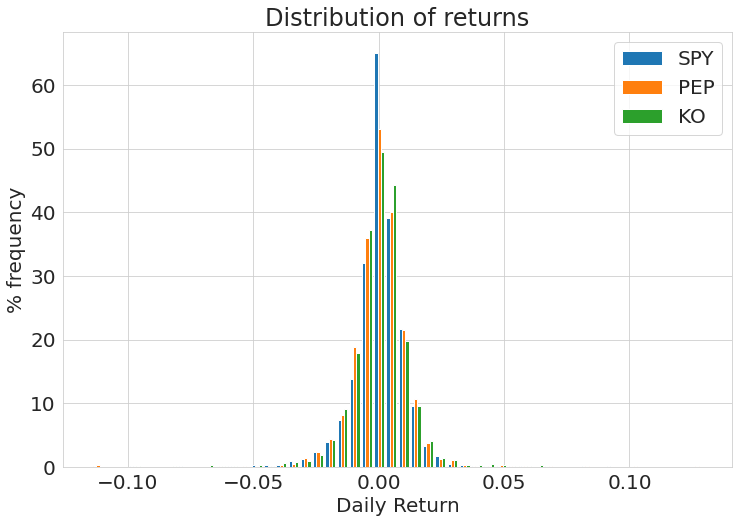

In [21]:
histo_list = [df_fundamental['S&P_daily'], df_fundamental['PEP_daily'], df_fundamental['KO_daily']]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})
plt.hist(histo_list, bins=50, histtype='bar', density=True)
plt.title('Distribution of returns')
plt.legend(['SPY', 'PEP','KO'])
plt.ylabel('% frequency')
plt.xlabel('Daily Return')
#plt.ylim((None,10.5))
plt.show()

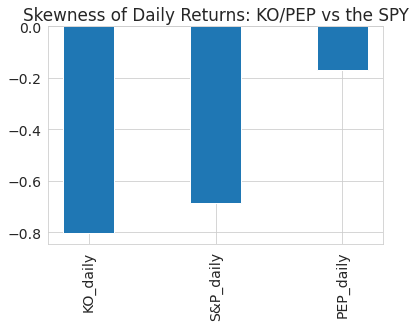

In [22]:
df_pct_change = df_fundamental[['S&P_daily','PEP_daily','KO_daily']]

skew = df_pct_change.skew(axis = 0, skipna = True)
skew.sort_values(inplace=True)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.title('Skewness of Daily Returns: KO/PEP vs the SPY')
plt.bar(skew.index, skew.values ,width=0.4);